<a href="https://colab.research.google.com/github/SushilKokare/AtiNeu_Project/blob/keras.applications/KA_1_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import backend as k
from keras.applications.xception import Xception
from matplotlib import pyplot as plt

In [46]:
def prepro_data(pathTrain,pathTest,img_size,batch_size):
  
  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  ) 

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape

In [47]:
pathTrain = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'
pathTest = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'

In [48]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),32)

Found 2251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [49]:
train_data.image_shape

(225, 225, 3)

In [50]:
# Base Model = Xception

In [51]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

In [52]:
for layer in base_model.layers:
  layer.trainable = False

In [53]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [54]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [56]:
history = model.fit(train_data,epochs=10,validation_data=test_data,
                    )

Epoch 1/10
71/71 [==============================] - 15s 216ms/step - loss: 0.0285 - accuracy: 0.9973 - val_loss: 0.5684 - val_accuracy: 0.7560
Epoch 2/10
71/71 [==============================] - 19s 261ms/step - loss: 0.0182 - accuracy: 0.9991 - val_loss: 0.4341 - val_accuracy: 0.7960
Epoch 3/10
71/71 [==============================] - 14s 196ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.6046 - val_accuracy: 0.7560
Epoch 4/10
71/71 [==============================] - 16s 227ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.6492 - val_accuracy: 0.7600
Epoch 5/10
71/71 [==============================] - 16s 225ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.6859 - val_accuracy: 0.7480
Epoch 6/10
71/71 [==============================] - 15s 213ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.6121 - val_accuracy: 0.7600
Epoch 7/10
71/71 [==============================] - 15s 211ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.7225 - val_accuracy: 0.7480

In [75]:
def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()

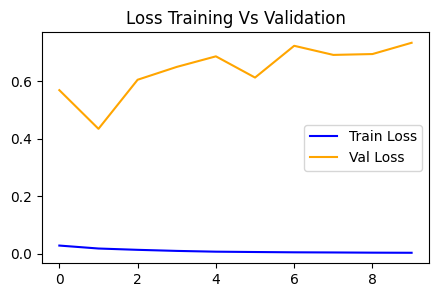

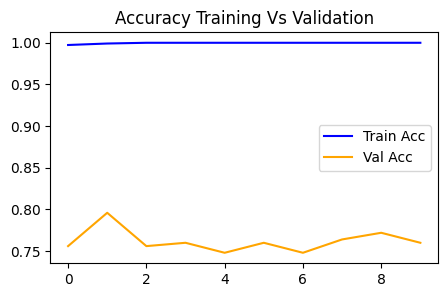

In [76]:
show_result(history)